In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine


In [79]:
housing_price=pd.read_csv(r'E:\New Downloads here\archive\housing.csv')


In [80]:
#Data Exploration

In [81]:
housing_price.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [82]:
housing_price.shape

(20640, 10)

In [83]:
housing_price.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [84]:
housing_price.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [85]:
housing_price.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [86]:
#Handling Null values ,Check for duplicates

In [87]:
print(housing_price.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [88]:
median_value=housing_price['total_bedrooms'].median()
print(median_value)

435.0


In [89]:
housing_price['total_bedrooms']=housing_price['total_bedrooms'].fillna(median_value)

In [90]:
print(housing_price.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [91]:
housing_price.duplicated().sum()

np.int64(0)

In [92]:
#Feature Engineering

In [93]:
housing_price['rooms_per_household']=housing_price['total_rooms']/housing_price['households']
housing_price['beedrooms_per_room']=housing_price['total_bedrooms']/housing_price['total_rooms']
housing_price['population_per_household']=housing_price['population']/housing_price['households']
housing_price.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,beedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467


In [94]:
#Creating Dummy variables for ocean_proximity

In [95]:
housing_price['ocean_proximity'].value_counts()


ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [96]:
dummies=pd.get_dummies(housing_price.ocean_proximity).astype(int)
dummies

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [97]:
housing_price_with_dummies=pd.concat([housing_price,dummies],axis='columns')
housing_price_with_dummies.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,beedrooms_per_room,population_per_household,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467,0,0,0,1,0


In [98]:
housing_price_clean=housing_price_with_dummies.drop(['ocean_proximity'],axis='columns')
housing_price_clean.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,beedrooms_per_room,population_per_household,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,0.146591,2.555556,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.155797,2.109842,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,0.129516,2.802260,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,0.184458,2.547945,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,0.172096,2.181467,0,0,0,1,0


In [99]:
#Histograms of features

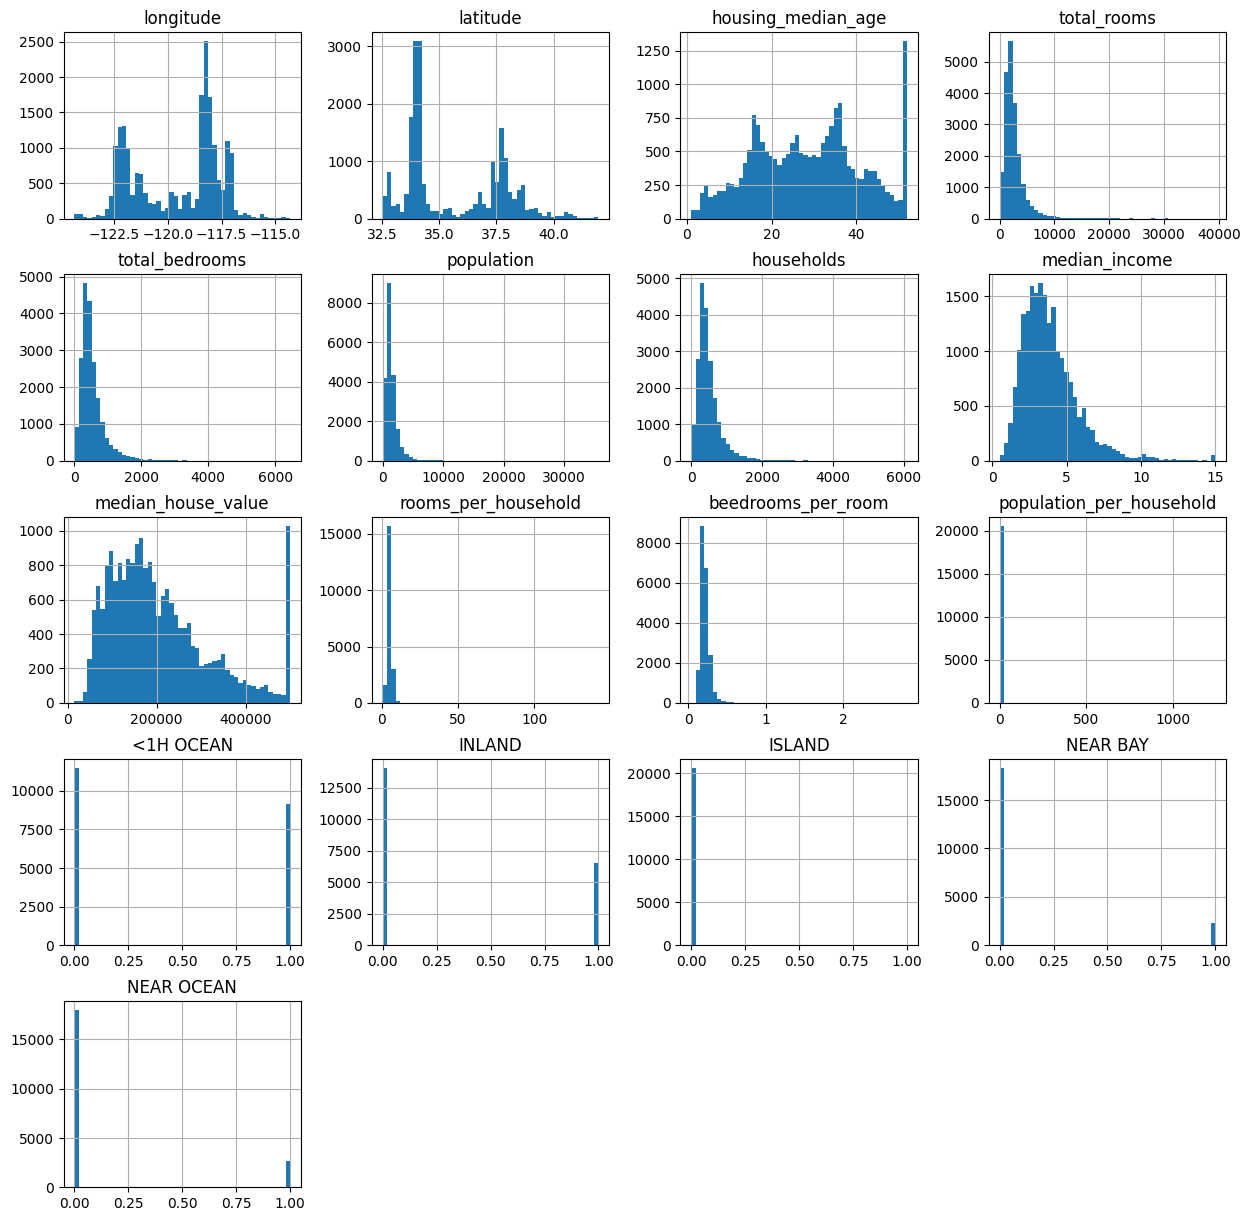

In [100]:
housing_price_clean.hist(bins=50,figsize=(15,15))
plt.show()

<Axes: xlabel='longitude', ylabel='latitude'>

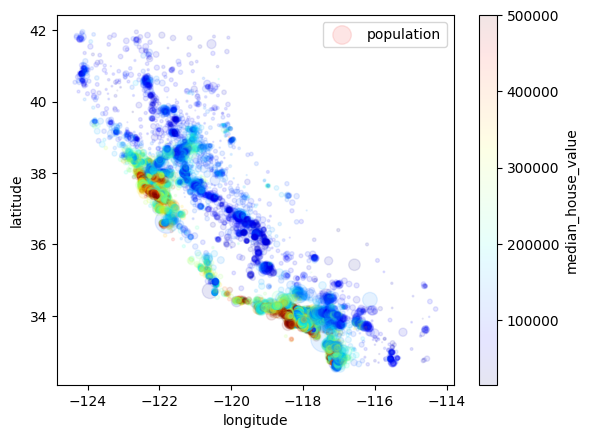

In [101]:
housing_price_clean.plot(kind='scatter',x='longitude',y='latitude',alpha=0.1,
                   s=housing_price['population']/100,label='population',
                   c="median_house_value",cmap=plt.get_cmap("jet"))

In [102]:
#Correlation with median_house_value

In [103]:
housing_correlation=housing_price_clean.corr()
housing_correlation['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
<1H OCEAN                   0.256617
NEAR BAY                    0.160284
rooms_per_household         0.151948
NEAR OCEAN                  0.141862
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049457
ISLAND                      0.023416
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
beedrooms_per_room         -0.233303
INLAND                     -0.484859
Name: median_house_value, dtype: float64

In [104]:
#Visual representation of how features are correlated with each other

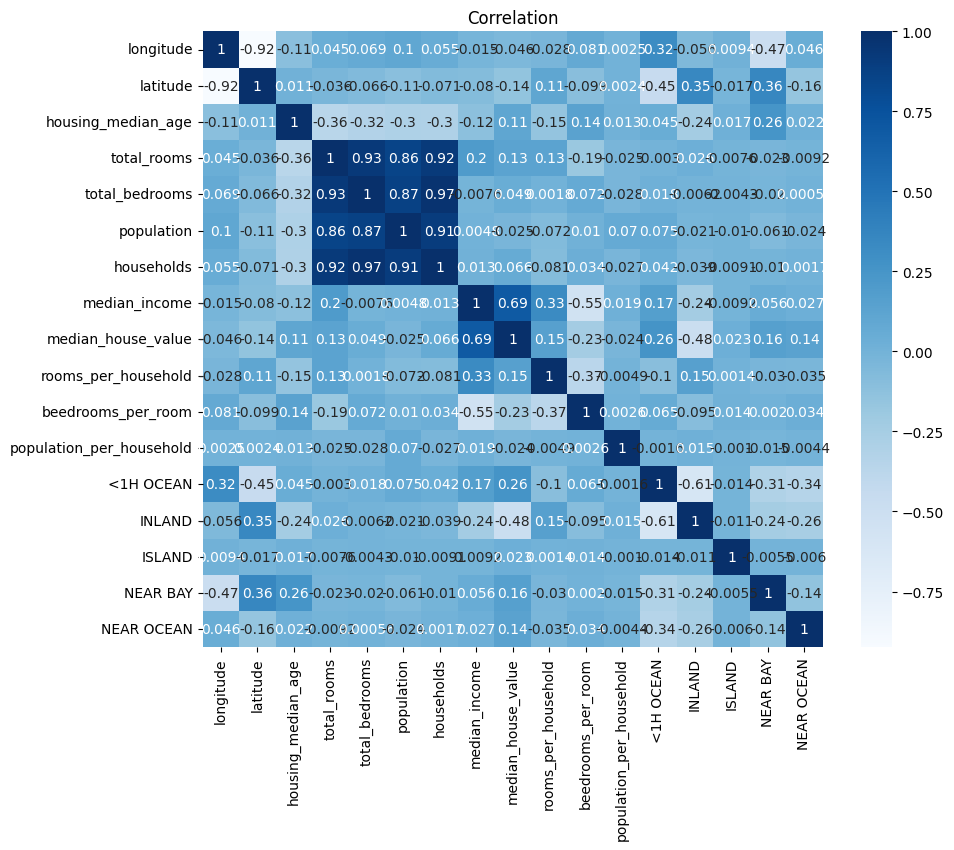

In [105]:
plt.figure(figsize=(10,8))
sns.heatmap(housing_price_clean.corr(),annot=True,cmap='Blues')
plt.title('Correlation')
plt.show()

In [106]:
#Boxplot Outliers

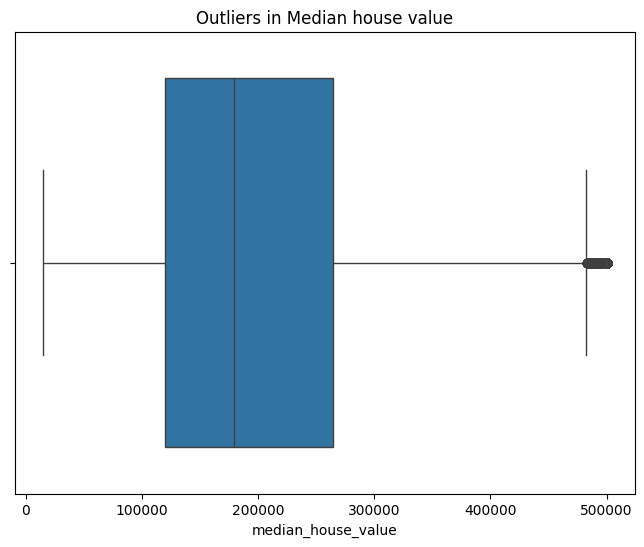

In [107]:
plt.figure(figsize=(8,6))
sns.boxplot(x=housing_price_clean['median_house_value'])
plt.title('Outliers in Median house value')
plt.show()

In [108]:
#Pairplot for Relationships Between Multiple Variables

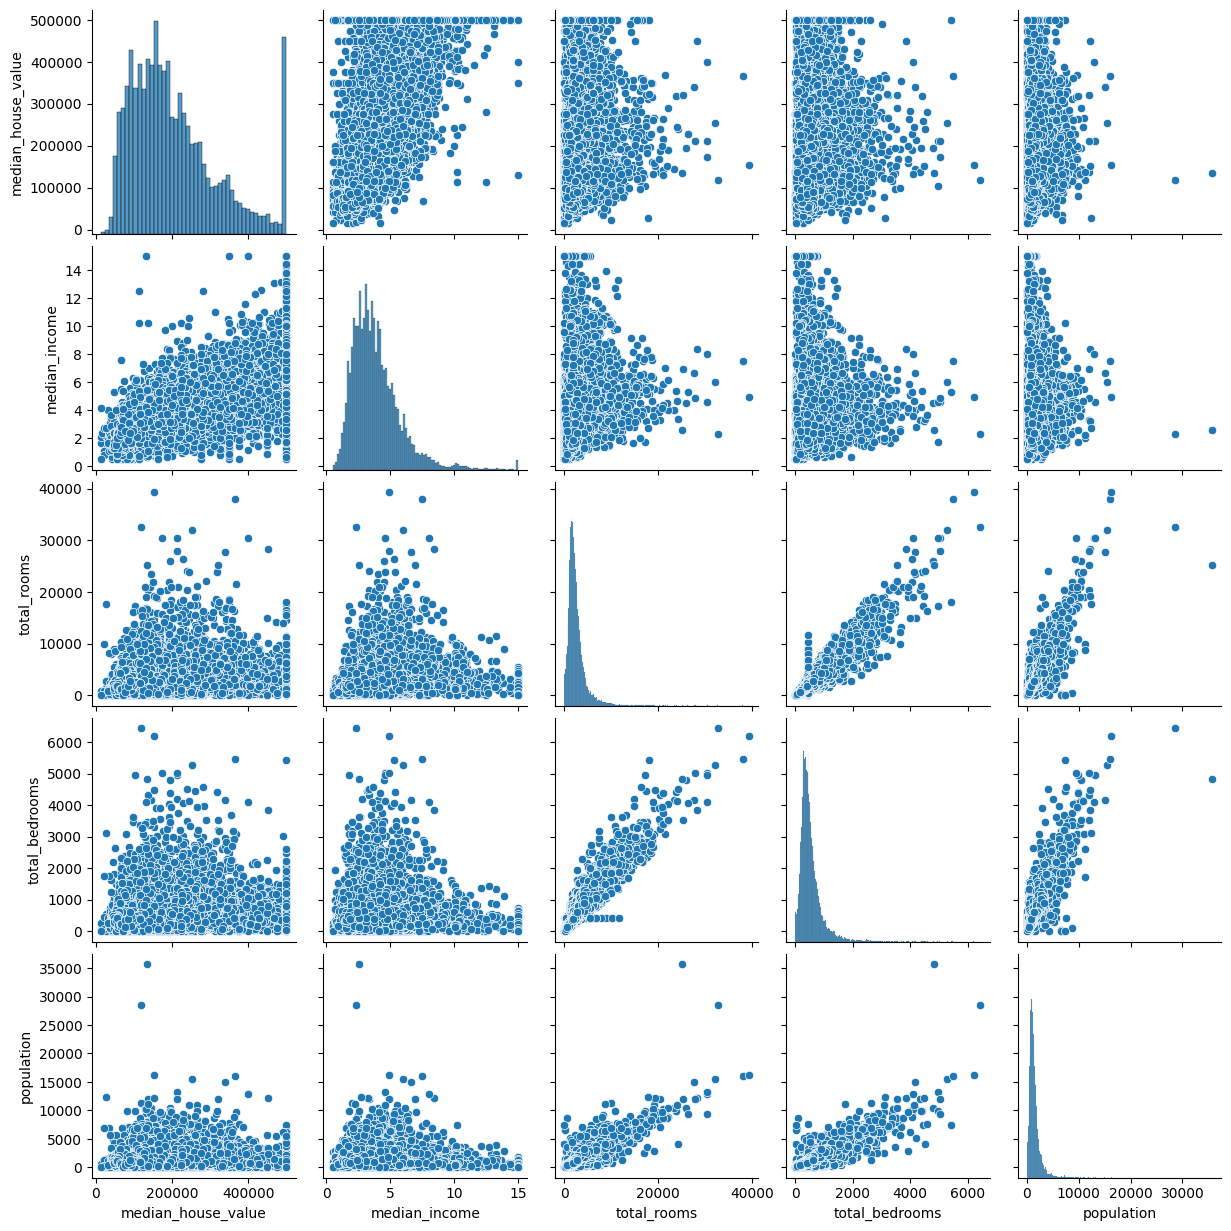

In [109]:
sns.pairplot(housing_price_clean[['median_house_value','median_income','total_rooms','total_bedrooms','population']])
plt.show()

In [110]:
#Connect To Database

In [111]:

db_user = 'postgres'
db_password = '1234'
db_host = '127.0.0.1'
db_port = '5432'
db_name = 'postgres'

engine = create_engine(f'postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}')

engine.connect()

In [112]:
print(housing_price_clean.columns)


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'rooms_per_household', 'beedrooms_per_room',
       'population_per_household', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY',
       'NEAR OCEAN'],
      dtype='object')


In [113]:
housing_price_clean.rename(columns={
    'beedrooms_per_room': 'bedrooms_per_room',  
    '<1H OCEAN': 'less_than_1h_ocean',         
    'INLAND': 'inland',                         
    'ISLAND': 'island',                         
    'NEAR BAY': 'near_bay',
    'NEAR OCEAN': 'near_ocean'                  
}, inplace=True)

In [114]:
#Load Data To Database

In [115]:
housing_price_clean.to_sql('housing_data', con=engine, if_exists='append', index=False)
print(housing_price_clean.columns)



Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'rooms_per_household', 'bedrooms_per_room',
       'population_per_household', 'less_than_1h_ocean', 'inland', 'island',
       'near_bay', 'near_ocean'],
      dtype='object')


In [116]:
#Verify that data loaded Sussessfully

In [117]:
query = 'SELECT * FROM housing_data LIMIT 5;'
result_df = pd.read_sql(query, con=engine)
print(result_df)

   id  longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0   1    -122.23     37.88                41.0        880.0           129.0   
1   2    -122.22     37.86                21.0       7099.0          1106.0   
2   3    -122.24     37.85                52.0       1467.0           190.0   
3   4    -122.25     37.85                52.0       1274.0           235.0   
4   5    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  \
0       322.0       126.0         8.3252            452600.0   
1      2401.0      1138.0         8.3014            358500.0   
2       496.0       177.0         7.2574            352100.0   
3       558.0       219.0         5.6431            341300.0   
4       565.0       259.0         3.8462            342200.0   

   rooms_per_household  bedrooms_per_room  population_per_household  \
0             6.984127           0.146591                  2.555556  